# Pymaceuticals Inc.
---

### Analysis

- The analysis of mouse weight and average tumor volume for the Capomulin regimen shows a strong positive correlation, with a Pearson correlation coefficient of approximately 0.84. This indicates that as mouse weight increases, the average tumor volume tends to increase as well. The linear regression model, with a slope of about 0.95, further confirms this trend, suggesting that for every additional gram of mouse weight, the average tumor volume increases by roughly 0.95 mm³. This strong correlation implies a significant relationship between mouse weight and tumor volume under the Capomulin treatment.
 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_data = pd.merge(mouse_metadata, study_results, on="Mouse ID")

# Display the data table for preview
combined_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [3]:
# Check the number of unique mice in the combined dataset
num_mice = combined_data['Mouse ID'].nunique()

# Display the number of mice
print(f"Number of unique mice: {num_mice}")



Number of unique mice: 249


In [4]:
# Find duplicate rows based on 'Mouse ID' and 'Timepoint'
duplicate_mice = combined_data[combined_data.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]

# Display the duplicate entries
duplicate_mice


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Find duplicate rows based on 'Mouse ID' and 'Timepoint'
duplicate_mice = combined_data[combined_data.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]

# Get the list of unique Mouse IDs that have duplicates
duplicate_mouse_ids = duplicate_mice['Mouse ID'].unique()

# Retrieve all data for the duplicate Mouse IDs
duplicate_mice_data = combined_data[combined_data['Mouse ID'].isin(duplicate_mouse_ids)]

# Display the data for the duplicate Mouse IDs
duplicate_mice_data


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [6]:
# Find duplicate rows based on 'Mouse ID' and 'Timepoint'
duplicate_mice = combined_data[combined_data.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]

# Get the list of unique Mouse IDs that have duplicates
duplicate_mouse_ids = duplicate_mice['Mouse ID'].unique()

# Create a clean DataFrame by excluding the duplicate Mouse IDs
clean_data = combined_data[~combined_data['Mouse ID'].isin(duplicate_mouse_ids)]

# Display the clean DataFrame
clean_data.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [7]:
# Check the number of unique mice in the clean DataFrame
num_clean_mice = clean_data['Mouse ID'].nunique()

# Display the number of mice in the clean DataFrame
print(f"Number of unique mice in the clean DataFrame: {num_clean_mice}")


Number of unique mice in the clean DataFrame: 248


## Summary Statistics

In [8]:
# Group the data by 'Drug Regimen' and calculate the summary statistics for 'Tumor Volume'
summary_stats = clean_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(
    mean_tumor_volume=('mean'),
    median_tumor_volume=('median'),
    tumor_volume_variance=('var'),
    tumor_volume_std=('std'),
    tumor_volume_sem=('sem')
)

# Display the summary statistics table
summary_stats


,mean_tumor_volume,median_tumor_volume,tumor_volume_variance,tumor_volume_std,tumor_volume_sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# Generate summary statistics for tumor volume in a single line using aggregation
summary_stats = clean_data.groupby('Drug Regimen').agg(
    mean_tumor_volume=('Tumor Volume (mm3)', 'mean'),
    median_tumor_volume=('Tumor Volume (mm3)', 'median'),
    tumor_volume_variance=('Tumor Volume (mm3)', 'var'),
    tumor_volume_std=('Tumor Volume (mm3)', 'std'),
    tumor_volume_sem=('Tumor Volume (mm3)', 'sem')
)

# Display the summary statistics table
summary_stats


,mean_tumor_volume,median_tumor_volume,tumor_volume_variance,tumor_volume_std,tumor_volume_sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

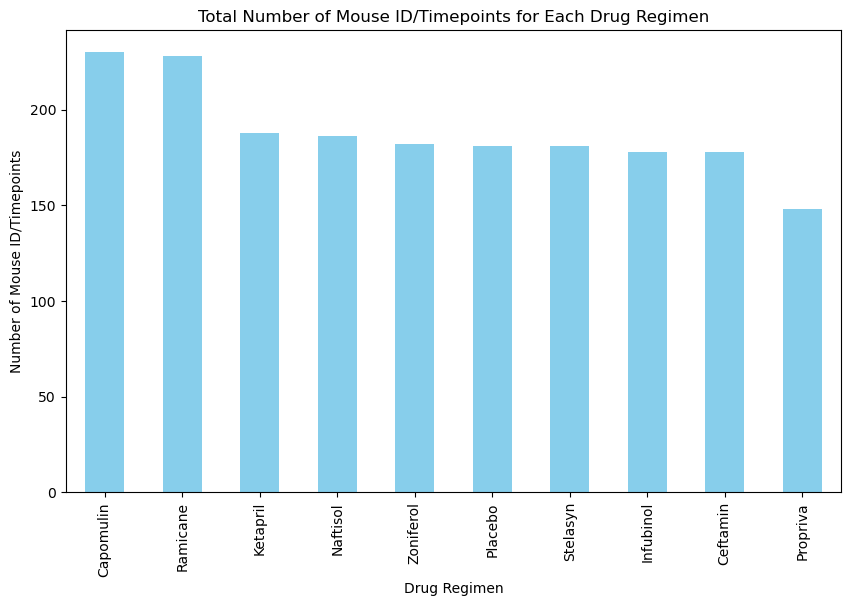

In [10]:
# Count the number of rows for each drug regimen
regimen_counts = clean_data['Drug Regimen'].value_counts()

# Generate a bar plot using the Pandas plot function
regimen_counts.plot(kind='bar', figsize=(10, 6), color='skyblue')

# Add labels and title
plt.title('Total Number of Mouse ID/Timepoints for Each Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Mouse ID/Timepoints')

# Display the plot
plt.show()


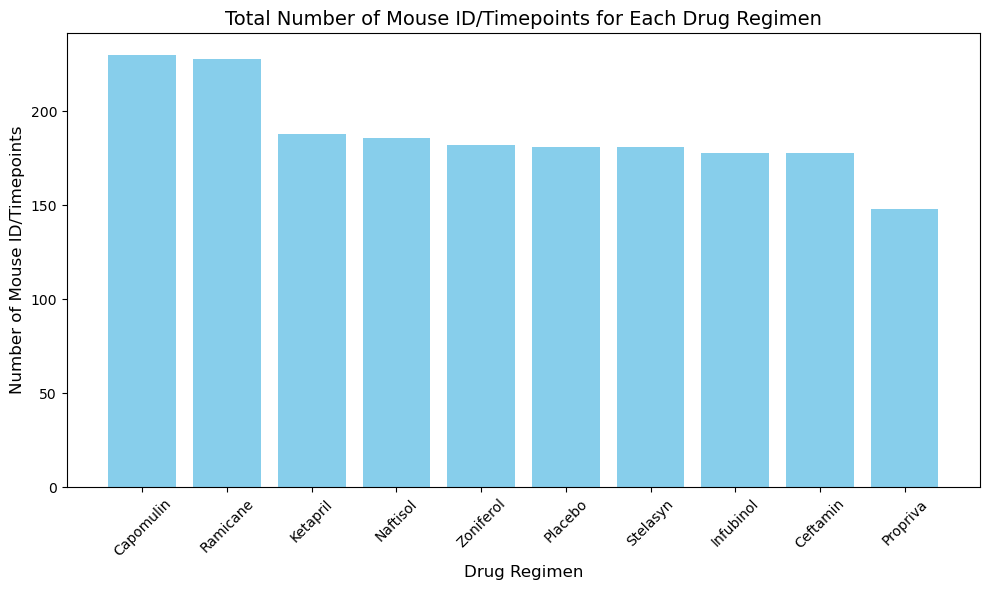

In [11]:
# Count the number of rows for each drug regimen
regimen_counts = clean_data['Drug Regimen'].value_counts()

# Generate a bar plot using pyplot
plt.figure(figsize=(10, 6))
plt.bar(regimen_counts.index, regimen_counts.values, color='skyblue')

# Add labels and title
plt.title('Total Number of Mouse ID/Timepoints for Each Drug Regimen', fontsize=14)
plt.xlabel('Drug Regimen', fontsize=12)
plt.ylabel('Number of Mouse ID/Timepoints', fontsize=12)
plt.xticks(rotation=45)  # Rotate the x labels for better readability

# Display the plot
plt.tight_layout()
plt.show()


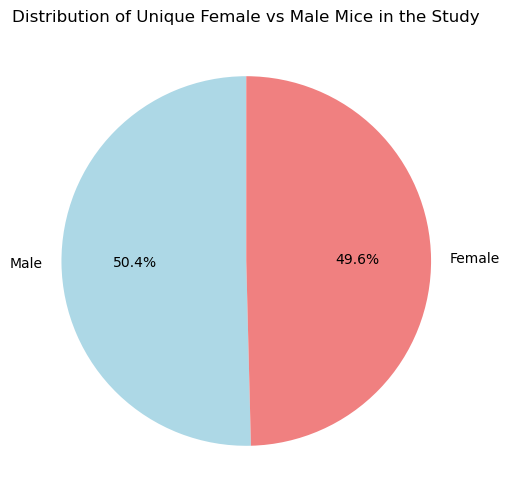

In [12]:
# Get the unique mice by 'Mouse ID' and their gender
unique_mice = clean_data[['Mouse ID', 'Sex']].drop_duplicates()

# Count the number of unique male and female mice
gender_counts = unique_mice['Sex'].value_counts()

# Generate a pie chart using Pandas plot function
gender_counts.plot.pie(autopct='%1.1f%%', startangle=90, figsize=(6, 6), colors=['lightblue', 'lightcoral'])

# Add title
plt.title('Distribution of Unique Female vs Male Mice in the Study')

# Display the plot
plt.ylabel('')  # Optional: remove the y-label for cleaner look
plt.show()


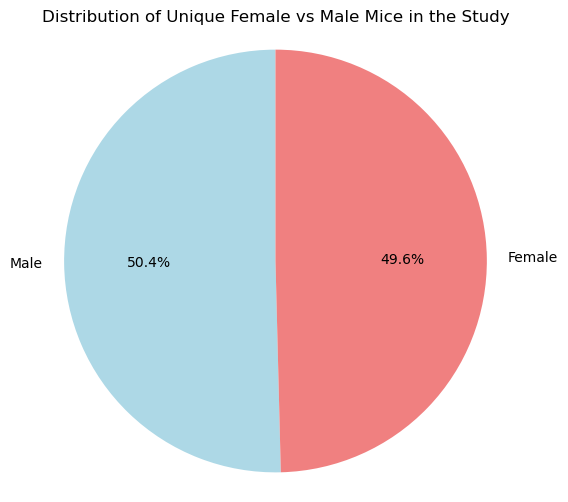

In [13]:
# Get the unique mice by 'Mouse ID' and their gender
unique_mice = clean_data[['Mouse ID', 'Sex']].drop_duplicates()

# Count the number of unique male and female mice
gender_counts = unique_mice['Sex'].value_counts()

# Generate a pie chart using pyplot
plt.figure(figsize=(6, 6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightcoral'])

# Add title
plt.title('Distribution of Unique Female vs Male Mice in the Study')

# Equal aspect ratio ensures that the pie is drawn as a circle
plt.axis('equal')

# Display the plot
plt.show()


## Quartiles, Outliers and Boxplots

In [14]:
# Filter the data to include only the four treatment regimens
target_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
filtered_data = clean_data[clean_data['Drug Regimen'].isin(target_regimens)]

# Get the last (greatest) timepoint for each mouse
last_timepoint = filtered_data.groupby('Mouse ID')['Timepoint'].max().reset_index()

# Merge the last_timepoint data with the original filtered data to get the tumor volume at the last timepoint
final_tumor_volume = pd.merge(last_timepoint, filtered_data, on=['Mouse ID', 'Timepoint'], how='left')

# Display the resulting DataFrame
final_tumor_volume.head()


,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a275,45,Ceftamin,Female,20,28,62.999356,3
3,a411,45,Ramicane,Male,3,22,38.407618,1
4,a444,45,Ramicane,Female,10,25,43.047543,0


In [15]:
# Put treatments into a list for the for loop (and for plot labels later)
treatment_list = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor volume data (for plotting)
tumor_vol_data = []

# Loop through each drug regimen to calculate the IQR and identify outliers
for drug in treatment_list:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    drug_data = final_tumor_volume[final_tumor_volume['Drug Regimen'] == drug]['Tumor Volume (mm3)']
    
    # Add the data to the list (for plotting purposes later)
    tumor_vol_data.append(drug_data)
    
    # Calculate the IQR
    quartiles = drug_data.quantile([0.25, 0.5, 0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    
    # Determine the lower and upper bounds to identify potential outliers
    lower_bound = lowerq - (1.5 * iqr)
    upper_bound = upperq + (1.5 * iqr)
    
    # Determine if there are any outliers
    outliers = drug_data[(drug_data < lower_bound) | (drug_data > upper_bound)]
    
    # Output the results for each drug
    print(f"{drug} Regimen:")
    print(f"  IQR: {iqr}")
    print(f"  Lower bound: {lower_bound}")
    print(f"  Upper bound: {upper_bound}")
    print(f"  Potential outliers: {outliers.tolist()}\n")


Capomulin Regimen:
  IQR: 7.781863460000004
  Lower bound: 20.70456164999999
  Upper bound: 51.83201549
  Potential outliers: []

Ramicane Regimen:
  IQR: 9.098536719999998
  Lower bound: 17.912664470000003
  Upper bound: 54.30681135
  Potential outliers: []

Infubinol Regimen:
  IQR: 11.477135160000003
  Lower bound: 36.83290494999999
  Upper bound: 82.74144559000001
  Potential outliers: [36.3213458]

Ceftamin Regimen:
  IQR: 15.577752179999997
  Lower bound: 25.355449580000002
  Upper bound: 87.66645829999999
  Potential outliers: []



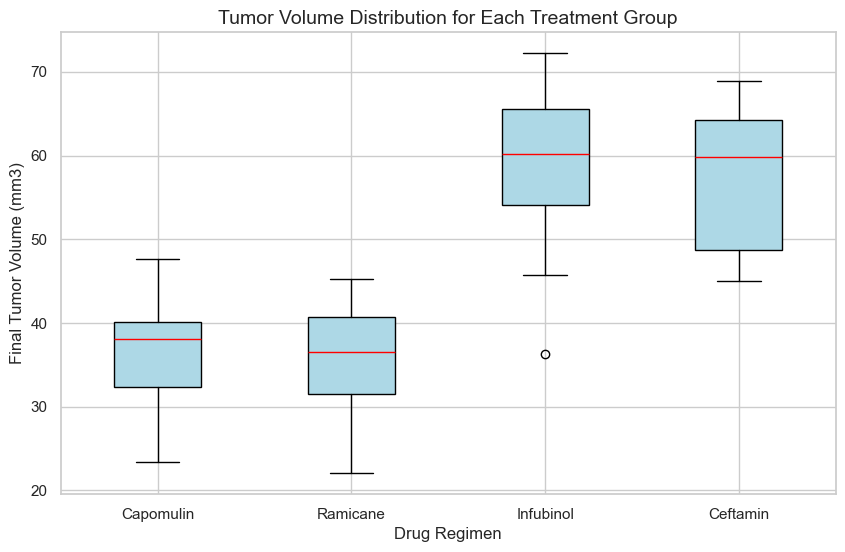

In [16]:
# Import seaborn for enhanced visual styling (optional)
import seaborn as sns

# Set the style for the plot
sns.set(style="whitegrid")

# Generate a box plot using the tumor volume data collected for each treatment group
plt.figure(figsize=(10, 6))

# Create the box plot
plt.boxplot(tumor_vol_data, labels=treatment_list, patch_artist=True,
            boxprops=dict(facecolor='lightblue', color='black'),
            medianprops=dict(color='red'))

# Add titles and labels
plt.title('Tumor Volume Distribution for Each Treatment Group', fontsize=14)
plt.ylabel('Final Tumor Volume (mm3)', fontsize=12)
plt.xlabel('Drug Regimen', fontsize=12)

# Display the plot
plt.show()


## Line and Scatter Plots

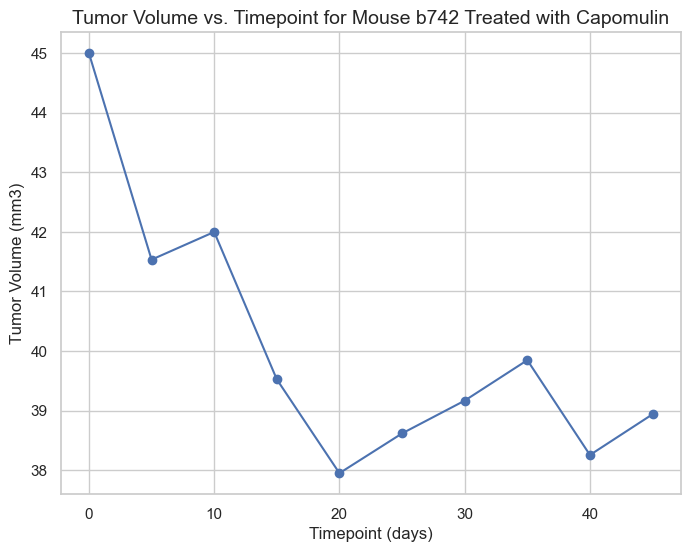

In [17]:
# Select a single mouse treated with Capomulin (example mouse: 'b742')
capomulin_mouse = clean_data[(clean_data['Drug Regimen'] == 'Capomulin') & (clean_data['Mouse ID'] == 'b742')]

# Generate a line plot of tumor volume vs. time point for the selected mouse
plt.figure(figsize=(8, 6))
plt.plot(capomulin_mouse['Timepoint'], capomulin_mouse['Tumor Volume (mm3)'], marker='o', linestyle='-', color='b')

# Add titles and labels
plt.title('Tumor Volume vs. Timepoint for Mouse b742 Treated with Capomulin', fontsize=14)
plt.xlabel('Timepoint (days)', fontsize=12)
plt.ylabel('Tumor Volume (mm3)', fontsize=12)

# Display the plot
plt.grid(True)
plt.show()


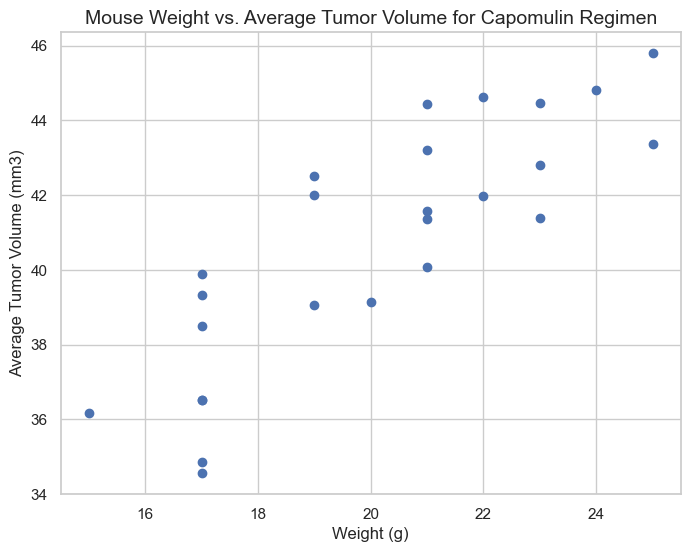

In [18]:
# Filter the data for the Capomulin regimen
capomulin_data = clean_data[clean_data['Drug Regimen'] == 'Capomulin']

# Calculate the average tumor volume for each mouse
avg_tumor_volume = capomulin_data.groupby('Mouse ID').agg(
    avg_tumor_volume=('Tumor Volume (mm3)', 'mean'),
    weight=('Weight (g)', 'first')  # Assuming weight remains constant for each mouse
).reset_index()

# Generate a scatter plot of mouse weight vs. average tumor volume
plt.figure(figsize=(8, 6))
plt.scatter(avg_tumor_volume['weight'], avg_tumor_volume['avg_tumor_volume'], color='b')

# Add titles and labels
plt.title('Mouse Weight vs. Average Tumor Volume for Capomulin Regimen', fontsize=14)
plt.xlabel('Weight (g)', fontsize=12)
plt.ylabel('Average Tumor Volume (mm3)', fontsize=12)

# Display the plot
plt.grid(True)
plt.show()


## Correlation and Regression

Correlation coefficient between mouse weight and average tumor volume: 0.84


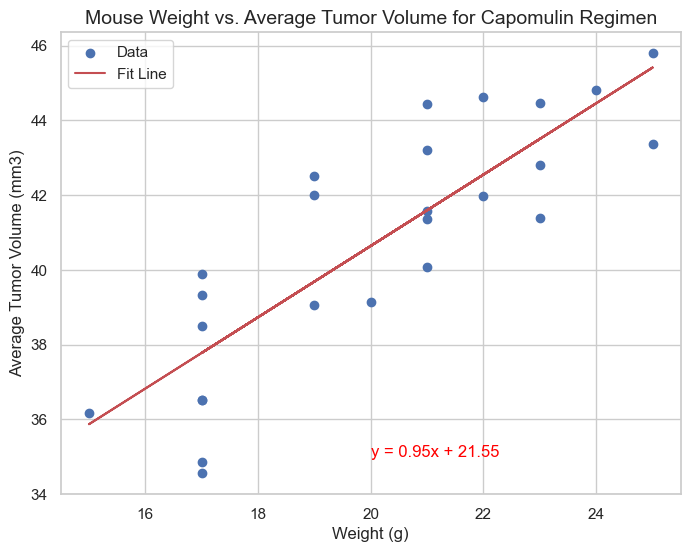

In [19]:
from scipy.stats import linregress

# Filter the data for the Capomulin regimen
capomulin_data = clean_data[clean_data['Drug Regimen'] == 'Capomulin']

# Calculate the average tumor volume for each mouse
avg_tumor_volume = capomulin_data.groupby('Mouse ID').agg(
    avg_tumor_volume=('Tumor Volume (mm3)', 'mean'),
    weight=('Weight (g)', 'first')  # Assuming weight remains constant for each mouse
).reset_index()

# Calculate the correlation coefficient (Pearson's correlation)
correlation = avg_tumor_volume['weight'].corr(avg_tumor_volume['avg_tumor_volume'])
print(f"Correlation coefficient between mouse weight and average tumor volume: {correlation:.2f}")

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(avg_tumor_volume['weight'], avg_tumor_volume['avg_tumor_volume'])

# Generate scatter plot with regression line
plt.figure(figsize=(8, 6))
plt.scatter(avg_tumor_volume['weight'], avg_tumor_volume['avg_tumor_volume'], color='b', label='Data')

# Plot the regression line
regression_values = slope * avg_tumor_volume['weight'] + intercept
plt.plot(avg_tumor_volume['weight'], regression_values, color='r', label='Fit Line')

# Add titles and labels
plt.title('Mouse Weight vs. Average Tumor Volume for Capomulin Regimen', fontsize=14)
plt.xlabel('Weight (g)', fontsize=12)
plt.ylabel('Average Tumor Volume (mm3)', fontsize=12)

# Add correlation and regression equation to the plot
plt.annotate(f'y = {slope:.2f}x + {intercept:.2f}', xy=(20, 35), fontsize=12, color='red')
plt.annotate(f'Correlation: {correlation:.2f}', xy=(20, 33), fontsize=12, color='red')

# Display the plot
plt.legend()
plt.grid(True)
plt.show()
